In [1]:
# Import os
import os

# Import all required modules
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.neighbors import KernelDensity
from scipy.stats import iqr
import streamlit as st



# Disable warnings
import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv(r'C:/Users/Mario Gouvea/OneDrive/Curso_Tera/docs_ok/base_tratada_posicoes.csv')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (119627, 76)


,ID,nome,data_nascimento,nacionalidade,Clube,divisao,perna_preferida,posicao,altura,peso,idade,valor_transferencia,salario,convocacoes,estilo,posicao_ideal,melhor_funcao,posicao_ideal_sigla,aceleracao,alcance_aereo,agressividade,agilidade,antecipacao,equilibrio,bravura,comanda_da_area,comunicacao,compostura,concentracao,cantos,cruzamento,decisao,determinacao,finta,excentricidade,finalizacao,primeiro_toque,imprevisibilidade,sofre_falta,jogo_de_maos,cabeceamento,impulsao,pontape,lideranca,remates_de_longe,lancamentos_longs,marcacao,aptidao_fisica,sem_bola,mano_a_mano,velocidade,Passing,marcacao_de_penalti,posicionamento,tendencia_socar,reflexos,tendencia_saida,resistencia,forca,desarme,trabalho_em_equipe,tecnica,arremesso,visao_de_jogo,work_rate,valor_min,valor_max,Funcao,atributos_media,atributos_tecnicos,atributos_mentais,atributos_fisicos,atributos_goleiro,valor_de_mercado,valor_atributos,salario_atributos
0,831079,Giorgio Chiellini,1984-08-14,ITA,LAFC,U.S.A. (MLS),Left Only,D (C),187,85,39,999999999,90500.0,117,Leader,central defender,Stopper,D (C),8,4,17,7,19,14,20,3,1,16,17,4,8,16,20,4,2,5,8,8,2,3,15,14,2,19,10,19,18,6,8,1,9,12,3,18,4,1,2,10,14,18,17,8,4,7,15,999999999.0,999999999.0,Zagueiro,9.829787,10.357143,15.500000,10.250,4.428571,999999999.0,1.017316e+08,9206.709957
1,2105510,Hulk,1986-07-25,BRA,ATM,Brazil (First Division),Left,"AM (R), ST (C)",179,95,37,999999999,259000.0,49,Physical,inverted winger,Support,AM (R),15,3,12,13,14,17,15,3,4,12,12,16,15,12,17,14,1,15,14,17,16,4,8,9,3,14,16,11,5,18,16,2,14,15,16,9,2,2,1,15,18,8,8,15,3,14,11,999999999.0,999999999.0,Meio-campista,10.957447,11.571429,13.071429,14.875,4.642857,999999999.0,9.126214e+07,23636.893204
2,78000335,Luis Suárez,1987-01-24,URU,Nacional,Uruguay (First Division),Right,ST (C),182,86,36,€65K - €650K,35000.0,132,Technical,deep lying forward,Support,ST (C),9,3,17,9,16,9,18,3,3,19,13,15,15,15,20,14,1,18,17,18,16,1,13,11,3,15,15,8,8,16,16,2,10,16,16,8,3,1,3,10,14,9,13,15,3,15,9,65000.0,650000.0,Atacante,11.085106,12.071429,15.142857,11.000,4.571429,357500.0,3.225048e+04,3157.389635
3,962988,Gonzalo Higuaín,1987-12-10,ARG,Inter Miami,U.S.A. (MLS),Right,ST (C),184,89,36,€90K - €900K,487000.0,75,Intelligent,deep lying forward,Support,ST (C),10,1,17,10,17,15,14,1,2,15,11,8,12,17,16,14,3,17,15,13,13,1,15,11,2,12,16,8,6,13,16,4,11,14,14,5,3,1,3,10,16,8,10,16,1,14,10,90000.0,900000.0,Atacante,10.234043,10.785714,13.357143,12.000,4.142857,495000.0,4.836798e+04,47586.278586
4,19007730,Alex Teixeira,1990-01-06,BRA,VDG,Brazil (Second Division),Right,"AM (LC), ST (C)",173,69,33,€275K - €2.9M,128000.0,0,Technical,inverted winger,Support,AM (L),13,3,9,13,13,11,11,3,1,14,10,7,7,14,16,15,3,13,16,15,7,2,7,6,1,12,12,5,5,14,14,2,13,12,13,7,2,1,3,11,7,5,10,16,2,11,10,275000.0,2900000.0,Meio-campista,8.851064,9.071429,11.857143,11.000,3.857143,1587500.0,1.793570e+05,14461.538462


In [3]:
df['salario_anual'] = df['salario'] * 12

In [4]:

# Supondo que você já tenha um DataFrame chamado 'df' com a coluna 'salario'
df.rename(columns={'salario': 'salario_mensal'}, inplace=True)

# Agora a coluna 'salario' foi renomeada para 'salario_mensal'


In [5]:
df = df.dropna()  # Remove linhas com valores ausentes


In [6]:
df = df.drop(columns=['atributos_media'])
df = df.drop(columns=['atributos_tecnicos'])
df = df.drop(columns=['atributos_mentais'])
df = df.drop(columns=['atributos_fisicos'])
df = df.drop(columns=['atributos_goleiro'])
df = df.drop(columns=['valor_atributos'])
df = df.drop(columns=['salario_atributos'])






In [7]:
df['atributos_media_linha'] = (df['cabeceamento'] + df['cantos'] + df['cruzamento'] + df['desarme'] + df['finalizacao'] + df['finta'] + df['lancamentos_longs'] + df['marcacao'] + df['marcacao_de_penalti'] + df['Passing'] + df['primeiro_toque'] + df['remates_de_longe'] + df['tecnica'] + df['agressividade'] + df['antecipacao'] + df['bravura'] + df['compostura'] + df['concentracao'] + df['decisao'] + df['determinacao'] + df['imprevisibilidade'] + df['work_rate'] + df['lideranca'] + df['posicionamento'] + df['sem_bola'] + df['trabalho_em_equipe'] + df['visao_de_jogo'] + df['aceleracao'] + df['agilidade'] + df['aptidao_fisica'] + df['equilibrio'] + df['forca'] + df['impulsao'] + df['resistencia'] + df['velocidade']) / 35
df['atributos_media_goleiro'] = (df['tendencia_saida'] + df['tendencia_socar'] + df['alcance_aereo'] +df['comanda_da_area'] + df['comunicacao'] + df['excentricidade'] +df['jogo_de_maos'] + df['Passing'] +df['pontape'] + df['primeiro_toque'] + df['reflexos'] +df['mano_a_mano'] + df['agressividade'] + df['antecipacao'] + df['bravura'] + df['compostura'] + df['concentracao'] + df['decisao'] + df['determinacao'] + df['imprevisibilidade'] + df['work_rate'] + df['lideranca'] + df['posicionamento'] + df['sem_bola'] + df['trabalho_em_equipe'] + df['visao_de_jogo'] + df['aceleracao'] + df['agilidade'] + df['aptidao_fisica'] + df['equilibrio'] + df['forca'] + df['impulsao'] + df['resistencia'] + df['velocidade']) / 34
df['atributos_goleiro'] = (df['tendencia_saida'] + df['tendencia_socar'] + df['alcance_aereo'] +df['comanda_da_area'] + df['comunicacao'] + df['excentricidade'] +df['jogo_de_maos'] +  df['Passing'] +df['pontape'] + df['primeiro_toque'] + df['reflexos'] +df['mano_a_mano']) /12
df['atributos_tecnica'] = (df['cabeceamento'] + df['cantos'] + df['cruzamento'] + df['desarme'] + df['finalizacao'] + df['finta'] + df['lancamentos_longs'] + df['marcacao'] + df['marcacao_de_penalti'] + df['Passing'] + df['primeiro_toque'] + df['remates_de_longe'] + df['tecnica']) /13
df['atributos_mentais'] = (df['agressividade'] + df['antecipacao'] + df['bravura'] + df['compostura'] + df['concentracao'] + df['decisao'] + df['determinacao'] + df['imprevisibilidade'] + df['work_rate'] + df['lideranca'] + df['posicionamento'] + df['sem_bola'] + df['trabalho_em_equipe'] + df['visao_de_jogo']) /14
df['atributos_fisico'] = (df['aceleracao'] + df['agilidade'] + df['aptidao_fisica'] + df['equilibrio'] + df['forca'] + df['impulsao'] + df['resistencia'] + df['velocidade']) / 8

In [8]:
df.to_csv('df_dash.csv', index=False)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118848 entries, 0 to 119626
Data columns (total 76 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       118848 non-null  int64  
 1   nome                     118848 non-null  object 
 2   data_nascimento          118848 non-null  object 
 3   nacionalidade            118848 non-null  object 
 4   Clube                    118848 non-null  object 
 5   divisao                  118848 non-null  object 
 6   perna_preferida          118848 non-null  object 
 7   posicao                  118848 non-null  object 
 8   altura                   118848 non-null  int64  
 9   peso                     118848 non-null  int64  
 10  idade                    118848 non-null  int64  
 11  valor_transferencia      118848 non-null  object 
 12  salario_mensal           118848 non-null  float64
 13  convocacoes              118848 non-null  int64  
 14  esti

EXPLORATORIA


In [10]:
df.describe().round(2)

,ID,altura,peso,idade,salario_mensal,convocacoes,aceleracao,alcance_aereo,agressividade,agilidade,antecipacao,equilibrio,bravura,comanda_da_area,comunicacao,compostura,concentracao,cantos,cruzamento,decisao,determinacao,finta,excentricidade,finalizacao,primeiro_toque,imprevisibilidade,sofre_falta,jogo_de_maos,cabeceamento,impulsao,pontape,lideranca,remates_de_longe,lancamentos_longs,marcacao,aptidao_fisica,sem_bola,mano_a_mano,velocidade,Passing,marcacao_de_penalti,posicionamento,tendencia_socar,reflexos,tendencia_saida,resistencia,forca,desarme,trabalho_em_equipe,tecnica,arremesso,visao_de_jogo,work_rate,valor_min,valor_max,valor_de_mercado,salario_anual,atributos_media_linha,atributos_media_goleiro,atributos_goleiro,atributos_tecnica,atributos_mentais,atributos_fisico
count,1.188480e+05,118848.00,118848.00,118848.0,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,1.188480e+05,1.188480e+05,1.188480e+05,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00,118848.00
mean,7.329107e+08,180.56,72.88,25.0,9895.66,1.40,11.58,3.00,10.20,11.22,9.38,8.79,8.99,2.85,2.80,8.71,8.64,6.03,6.84,10.76,10.73,7.88,2.57,6.96,9.73,8.13,6.20,3.04,7.97,9.27,2.89,8.20,6.88,4.94,7.42,11.93,8.45,2.83,11.39,9.50,5.52,8.69,2.85,3.10,2.85,9.52,8.05,7.99,9.13,9.32,2.74,8.33,10.01,2.192974e+07,2.242310e+07,2.217642e+07,118747.92,8.77,7.59,4.00,7.46,9.17,10.22
std,9.327344e+08,7.04,7.35,5.4,54385.98,8.06,2.13,2.93,3.06,2.09,2.63,2.94,3.27,2.53,2.39,2.75,2.72,2.95,3.51,2.38,4.05,3.92,1.90,3.63,3.19,3.65,3.07,3.00,3.67,3.40,2.66,3.56,3.27,3.16,3.54,2.59,3.55,2.51,2.04,2.73,3.59,3.01,2.59,3.19,2.59,3.29,3.44,4.02,2.96,3.31,2.30,3.04,2.85,1.448678e+08,1.448501e+08,1.448565e+08,652631.72,1.65,1.13,1.86,2.26,1.68,1.46
min,1.113300e+04,150.00,55.00,17.0,9.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.000000e+00,1.000000e+03,5.000000e+02,108.00,3.60,3.68,1.33,1.00,3.21,3.62
25%,3.401178e+07,176.00,68.00,20.0,700.00,0.00,10.00,1.00,8.00,10.00,8.00,7.00,7.00,1.00,1.00,7.00,7.00,4.00,4.00,9.00,8.00,5.00,1.00,4.00,8.00,5.00,4.00,1.00,6.00,7.00,1.00,6.00,5.00,2.00,5.00,10.00,6.00,1.00,10.00,8.00,3.00,6.00,1.00,1.00,1.00,7.00,5.00,5.00,7.00,7.00,1.00,6.00,8.00,0.000000e+00,2.200000e+04,1.300000e+04,8400.00,7.66,6.82,3.17,6.15,8.00,9.25
50%,6.802035e+07,180.00,73.00,24.0,1500.00,0.00,12.00,2.00,10.00,11.00,10.00,9.00,9.00,2.00,2.00,9.00,9.00,6.00,7.00,11.00,11.00,8.00,2.00,7.00,10.00,8.00,6.00,2.00,8.00,9.00,2.00,8.00,7.00,5.00,7.00,12.00,9.00,2.00,12.00,10.00,5.00,9.00,2.00,2.00,2.00,10.00,8.00,8.00,9.00,10.00,2.00,8.00,10.00,1.200000e+04,9.000000e+04,5.000000e+04,18000.00,8.83,7.53,3.50,7.85,9.14,10.25
75%,2.000082e+09,186.00,78.00,29.0,4200.00,0.00,13.00,3.00,13.00,13.00,11.00,11.00,11.00,3.00,3.00,11.00,11.00,8.00,10.00,13.00,14.00,11.00,3.00,10.00,12.00,11.00,8.00,3.00,11.00,12.00,3.00,11.00,9.00,7.00,10.00,14.00,11.00,3.00,13.00,11.00,8.00,11.00,3.00,3.00,3.00,12.00,11.00,11.00,12.00,12.00,3.00,11.00,12.00,6.500000e+04,4.500000e+05,2.625000e+05,50400.00,9.97,8.29,3.83,9.08,10.36,11.25
max,2.002041e+09,208.00,112.00,53.0,4155000.00,196.00,20.00,20.00,20.00,19.00,20.00,20.00,20.00,20.00,20.00,20.00,19.00,20.00,19.00,19.00,20.00,20.00,20.00,19.00,20.00,20.00,20.00,18.00,20.00,20.00,20.00,20.00,19.00,20.00,18.00,20.00,20.00,19.00,20.00,20.00,20.00,19.00,19.00,19.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,1.000000e+09,1.00

In [11]:
objects = ['nome', 'Clube', 'data_nascimento', 'nacionalidade', 'divisao', 'perna_preferida', 'estilo','Funcao', 'posicao', 'valor_transferencia', 'posicao_ideal', 'melhor_funcao', 'posicao_ideal_sigla']

numbers = ['ID', 'altura', 'peso', 'idade', 'salario', 'convocacoes', 'aceleracao', 'alcance_aereo', 'agressividade', 'agilidade', 'antecipacao', 'equilibrio', 'bravura', 'comanda_da_area', 'comunicacao', 'compostura', 'concentracao', 'cantos', 'cruzamento', 'decisao', 'determinacao', 'finta', 'excentricidade', 'finalizacao', 'primeiro_toque', 'imprevisibilidade', 'sofre_falta', 'jogo_de_maos', 'cabeceamento', 'impulsao', 'pontape', 'lideranca', 'remates_de_longe', 'lancamentos_longs', 'marcacao', 'aptidao_fisica', 'sem_bola', 'mano_a_mano', 'velocidade', 'Passing', 'marcacao_de_penalti', 'posicionamento', 'tendencia_socar', 'reflexos', 'tendencia_saida', 'resistencia', 'forca', 'desarme', 'trabalho_em_equipe', 'tecnica', 'arremesso', 'visao_de_jogo', 'work_rate', 'valor_min', 'valor_max', 'atributos_media_linha', 'atributos_media_goleiro' 'atributos_tecnicos', 'atributos_mentais', 'atributos_fisicos', 'atributos_goleiro', 'valor_de_mercado', 'valor_atributos']

In [12]:
df. nunique()

ID                         118848
nome                       113229
data_nascimento              8640
nacionalidade                 212
Clube                        8210
divisao                      1055
perna_preferida                 5
posicao                       784
altura                         57
peso                           57
idade                          36
valor_transferencia          1647
salario_mensal                669
convocacoes                   155
estilo                          8
posicao_ideal                  45
melhor_funcao                   6
posicao_ideal_sigla            14
aceleracao                     20
alcance_aereo                  20
agressividade                  20
agilidade                      19
antecipacao                    20
equilibrio                     20
bravura                        20
comanda_da_area                19
comunicacao                    20
compostura                     20
concentracao                   19
cantos        

In [13]:
df_encoded = pd.get_dummies(df, columns=['perna_preferida', 'estilo', 'Funcao', 'posicao_ideal'])



In [14]:
caracteristicas = ['altura', 'peso', 'salario_anual', 'aceleracao', 'alcance_aereo', 'agressividade', 'agilidade', 'antecipacao', 'equilibrio', 'bravura', 'comanda_da_area', 'comunicacao', 'compostura', 'concentracao', 'cantos', 'cruzamento', 'decisao', 'determinacao', 'finta', 'excentricidade', 'finalizacao', 'primeiro_toque', 'imprevisibilidade', 'sofre_falta', 'jogo_de_maos', 'cabeceamento', 'impulsao', 'pontape', 'lideranca', 'remates_de_longe', 'lancamentos_longs', 'marcacao', 'aptidao_fisica', 'sem_bola', 'mano_a_mano', 'velocidade', 'Passing', 'marcacao_de_penalti', 'posicionamento', 'tendencia_socar', 'reflexos', 'tendencia_saida', 'resistencia', 'forca', 'desarme', 'trabalho_em_equipe', 'tecnica', 'arremesso', 'visao_de_jogo', 'work_rate', 'valor_de_mercado','posicao_ideal' ]

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Crie um objeto MinMaxScaler
scaler = MinMaxScaler()

# Selecione as colunas de características que deseja normalizar
caracteristicas = ['altura', 'peso', 'salario_anual', 'aceleracao', 'alcance_aereo', 'agressividade', 'agilidade', 'antecipacao', 'equilibrio', 'bravura', 'comanda_da_area', 'comunicacao', 'compostura', 'concentracao', 'cantos', 'cruzamento', 'decisao', 'determinacao', 'finta', 'excentricidade', 'finalizacao', 'primeiro_toque', 'imprevisibilidade', 'sofre_falta', 'jogo_de_maos', 'cabeceamento', 'impulsao', 'pontape', 'lideranca', 'remates_de_longe', 'lancamentos_longs', 'marcacao', 'aptidao_fisica', 'sem_bola', 'mano_a_mano', 'velocidade', 'Passing', 'marcacao_de_penalti', 'posicionamento', 'tendencia_socar', 'reflexos', 'tendencia_saida', 'resistencia', 'forca', 'desarme', 'trabalho_em_equipe', 'tecnica', 'arremesso', 'visao_de_jogo', 'work_rate', 'valor_de_mercado', 'atributos_media_linha' , 'atributos_media_goleiro', 'atributos_tecnica' , 'atributos_mentais' , 'atributos_fisico']

# Aplique a normalização nas colunas selecionadas e crie novas colunas com os valores normalizados
df_norm = df.copy()  # Crie uma cópia do DataFrame original

# Aplicar a normalização e criar as novas colunas normalizadas
for coluna in caracteristicas:
    coluna_norm = f"{coluna}_norm"
    df_norm[coluna_norm] = scaler.fit_transform(df_norm[[coluna]])

# Agora, df_norm contém todas as colunas originais e as colunas normalizadas com os sufixos "_norm".


In [16]:
# Adicione "_norm" a todas as características
caracteristicas_norm = [f'{coluna}_norm' for coluna in caracteristicas]


In [17]:
from sklearn.neighbors import NearestNeighbors

def calcular_ability(row, max_salary):
    age = row['idade']
    ca = row['atributos_media_linha']
    salary = row['salario_anual']
    
    ability = ca + (20 - age) * (1 - salary / max_salary) / 100
    return round(ability, 2)  # Arredonda para 2 casas decimais

# Função para encontrar jogadores semelhantes
def encontrar_jogadores_semelhantes(id_jogador_desejado, idade_maxima, salario_maximo, k, df_norm):
    jogador_alvo = df_norm.loc[df_norm['ID'] == id_jogador_desejado]
    df_filtrado = df_norm[(df_norm['idade'] <= idade_maxima)]

    # Filtrar jogadores pela posição ideal do jogador alvo
    posicao_ideal_alvo = jogador_alvo['posicao_ideal'].iloc[0]
    df_filtrado = df_filtrado[df_filtrado['posicao_ideal'] == posicao_ideal_alvo]

    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(df_filtrado[caracteristicas_norm])

    distancias, indices = knn.kneighbors(jogador_alvo[caracteristicas_norm])

    jogadores_semelhantes = df_filtrado.iloc[indices[0]].copy()
    max_salary = salario_maximo

    # Calcular a Ability e arredondar as colunas desejadas
    jogadores_semelhantes['ability'] = jogadores_semelhantes.apply(
        lambda row: round(calcular_ability(row, max_salary), 2),
        axis=1
    )

    # Adicionar o jogador alvo na primeira posição
    jogadores_semelhantes = pd.concat([jogador_alvo, jogadores_semelhantes]).reset_index(drop=True)

    # Remover o jogador alvo dos resultados (para garantir que não esteja duplicado)
    jogadores_semelhantes = jogadores_semelhantes[jogadores_semelhantes['ID'] != id_jogador_desejado]

    return jogadores_semelhantes

    
# Exemplo de uso da função para encontrar os 5 melhores jogadores em termos de custo-benefício com idade máxima de 31 anos e salário máximo de 1000000 (por exemplo)
resultado = encontrar_jogadores_semelhantes(29179241, 31, 105000000, 10, df_norm)

# Exibir o resultado, incluindo a Ability
resultado[['ID', 'nome', 'Clube', 'idade', 'altura', 'peso', 'salario_mensal', 'posicao_ideal', 'atributos_media_linha', 'atributos_tecnica', 'atributos_mentais', 'atributos_fisico']].sort_values('atributos_media_linha', ascending=False)


,ID,nome,Clube,idade,altura,peso,salario_mensal,posicao_ideal,atributos_media_linha,atributos_tecnica,atributos_mentais,atributos_fisico
6,30035404,Gabriel Barbosa,FLA,27,178,74,291000.0,advanced forward,13.314286,12.615385,13.642857,13.875
4,19220266,Gabriel Jesus,Arsenal,26,175,73,503000.0,advanced forward,13.028571,11.846154,13.500000,14.125
8,29030379,Danny Ings,Aston Villa,31,178,74,628000.0,advanced forward,12.857143,11.230769,14.000000,13.500
2,13158205,Victor Osimhen,Parthenope,25,185,78,481000.0,advanced forward,12.514286,10.461538,12.857143,15.250
3,93070286,Alexander Isak,Newcastle,24,190,74,603000.0,advanced forward,12.428571,10.846154,12.500000,14.875
5,19259566,Pedro,FLA,26,185,78,155000.0,advanced forward,12.371429,11.461538,12.785714,13.125
9,19342183,Evanilson,FC Porto,24,183,80,138000.0,advanced forward,12.371429,10.923077,12.714286,14.125
10,25042141,Patrik Schick,Bayer 04,27,191,86,477000.0,advanced forward,12.342857,11.461538,12.214286,14.000
7,85104422,Moussa Dembélé,OL,27,183,74,266000.0,advanced forward,12.000000,10.230769,12.357143,14.250


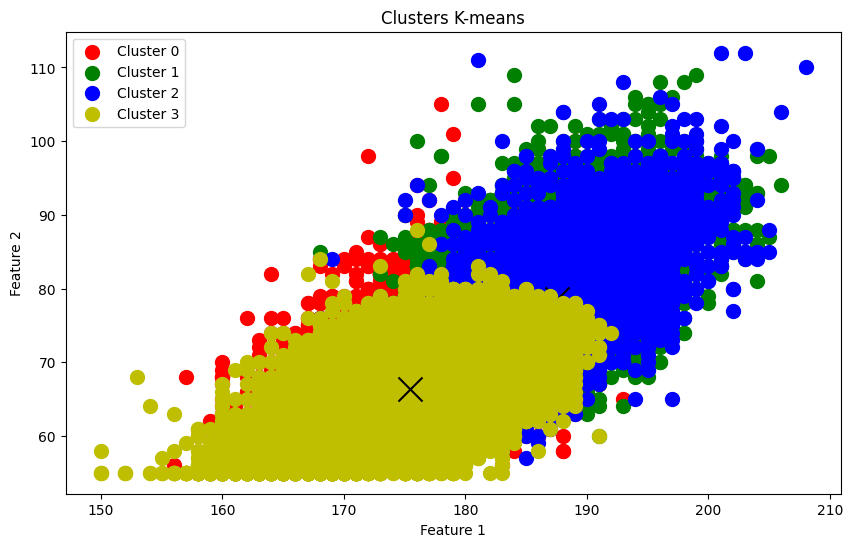

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supondo que 'df' seja seu DataFrame e que as características estão normalizadas
caracteristicas = ['altura', 'peso', 'aceleracao', 'alcance_aereo', 'agressividade', 'agilidade', 'antecipacao', 'equilibrio', 'bravura', 'comanda_da_area', 'comunicacao', 'compostura', 'concentracao', 'cantos', 'cruzamento', 'decisao', 'determinacao', 'finta', 'excentricidade', 'finalizacao', 'primeiro_toque', 'imprevisibilidade', 'sofre_falta', 'jogo_de_maos', 'cabeceamento', 'impulsao', 'pontape', 'lideranca', 'remates_de_longe', 'lancamentos_longs', 'marcacao', 'aptidao_fisica', 'sem_bola', 'mano_a_mano', 'velocidade', 'Passing', 'marcacao_de_penalti', 'posicionamento', 'tendencia_socar', 'reflexos', 'tendencia_saida', 'resistencia', 'forca', 'desarme', 'trabalho_em_equipe', 'tecnica', 'arremesso', 'visao_de_jogo', 'work_rate']
df_cluster = df[caracteristicas]

# Ajuste o K-means
kmeans = KMeans(n_clusters=4)  # escolha o número de clusters
df_cluster['cluster'] = kmeans.fit_predict(df_cluster)

# Plotar os clusters
plt.figure(figsize=(10, 6))
cores = ['r', 'g', 'b', 'y', 'c', 'm']  # cores para os clusters

for i in range(kmeans.n_clusters):
    # Plotar os pontos de cada cluster
    plt.scatter(df_cluster[df_cluster['cluster'] == i][caracteristicas[0]],
                df_cluster[df_cluster['cluster'] == i][caracteristicas[1]],
                s=100, c=cores[i], label=f'Cluster {i}')
    
    # Plotar os centros dos clusters
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], s=300, c='black', marker='x')

plt.title('Clusters K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


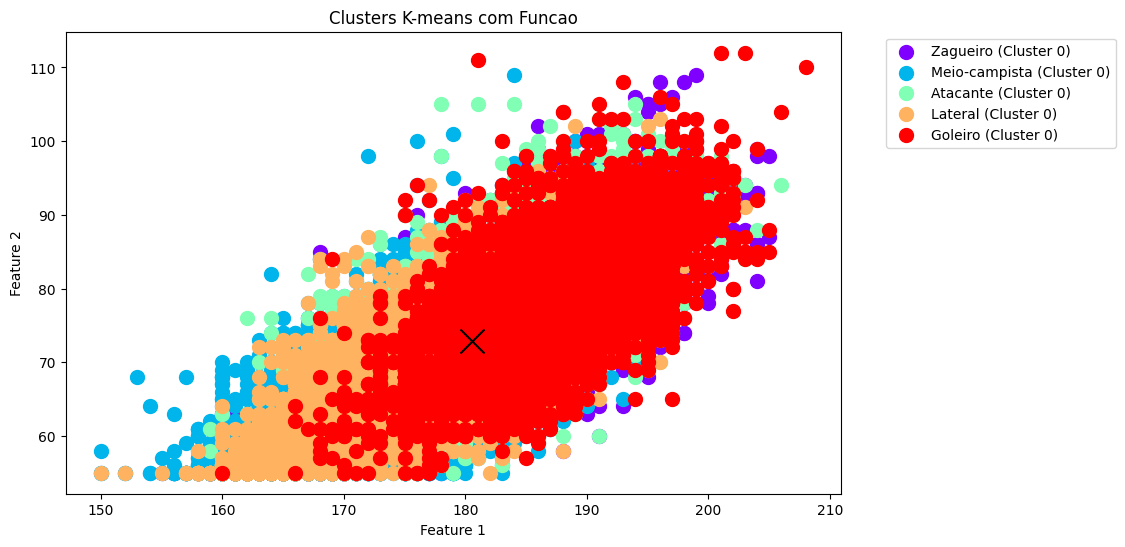

In [19]:
# Ajuste o K-means nas características numéricas
kmeans = KMeans(n_clusters=1)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster[caracteristicas])

# Adiciona a coluna 'Funcao' ao DataFrame dos clusters
df_cluster['Funcao'] = df['Funcao']  # Supondo que 'Funcao' exista no DataFrame original 'df'

# Cria um mapa de cores para as funções dos jogadores
funcoes_unicas = df_cluster['Funcao'].unique()
cores_funcoes = plt.cm.rainbow(np.linspace(0, 1, len(funcoes_unicas)))
mapa_cores = dict(zip(funcoes_unicas, cores_funcoes))

# Plotar os clusters
plt.figure(figsize=(10, 6))

for cluster_num in range(kmeans.n_clusters):
    cluster = df_cluster[df_cluster['cluster'] == cluster_num]
    for funcao in funcoes_unicas:
        cluster_funcao = cluster[cluster['Funcao'] == funcao]
        plt.scatter(cluster_funcao[caracteristicas[0]], cluster_funcao[caracteristicas[1]],
                    s=100, c=[mapa_cores[funcao]], label=f'{funcao} (Cluster {cluster_num})')

# Plotar os centros dos clusters
for i, center in enumerate(kmeans.cluster_centers_):
    plt.scatter(center[0], center[1], s=300, c='black', marker='x')

plt.title('Clusters K-means com Funcao')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move a legenda para fora do gráfico
plt.show()


In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que seu dataframe seja df

# Filtrar o dataframe com base no ID do jogador desejado
id_jogador_desejado = [19024412]  # Substitua pelo ID do jogador desejado
jogadores_semelhantes = encontrar_jogadores_semelhantes(id_jogador_desejado, idade_maxima, salario_maximo, k, df_norm)

# Crie um gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(jogadores_semelhantes['Atributos de Linha'], jogadores_semelhantes['Salário Anual'], label='Jogadores')
plt.scatter(df[df['ID'] == id_jogador_desejado]['Atributos de Linha'], df[df['ID'] == id_jogador_desejado]['Salário Anual'], color='green', label='Jogador Alvo')
plt.title('Gráfico de Dispersão: Atributos de Linha vs. Salário Anual')
plt.xlabel('Atributos de Linha')
plt.ylabel('Salário Anual')

# Adicione etiquetas para cada ponto
for i, row in jogadores_semelhantes.iterrows():
    plt.annotate(row['nome'], (row['Atributos de Linha'], row['Salário Anual']))

# Linha de tendência
z = np.polyfit(jogadores_semelhantes['Atributos de Linha'], jogadores_semelhantes['Salário Anual'], 1)
p = np.poly1d(z)
plt.plot(jogadores_semelhantes['Atributos de Linha'], p(jogadores_semelhantes['Atributos de Linha']), "r--", label='Linha de Tendência')

plt.legend()
plt.show()


NameError: name 'idade_maxima' is not defined

In [ ]:
jogador_buscado = df.loc[df['nome'] == 'Erling Haaland']

# Exibir as informações do jogador
jogador_buscado[['ID', 'nome', 'Clube', 'idade', 'altura', 'peso', 'salario_mensal', 'posicao_ideal', 'atributos_media_linha', 'atributos_tecnica', 'atributos_mentais', 'atributos_fisico']]

,ID,nome,Clube,idade,altura,peso,salario_mensal,posicao_ideal,atributos_media_linha,atributos_tecnica,atributos_mentais,atributos_fisico
94003,29179241,Erling Haaland,Man City,23,195,88,1709000.0,advanced forward,14.257143,12.0,14.714286,17.125


In [ ]:
    from dash import Dash, dcc, html, dash_table
    from dash.dependencies import Input, Output
    import plotly.express as px
    import pandas as pd  # Certifique-se de importar pandas

    # Suponhamos que você já tenha definido a função 'encontrar_jogadores_semelhantes' e o DataFrame 'df_norm'

# Definir colunas para a tabela
columns_table = [
    {'name': 'ID', 'id': 'ID'},
    {'name': 'nome', 'id': 'nome'},
    {'name': 'data_nascimento', 'id': 'data_nascimento'},
    {'name': 'nacionalidade', 'id': 'nacionalidade'},
    {'name': 'Clube', 'id': 'Clube'},
    {'name': 'divisao', 'id': 'divisao'},
    {'name': 'valor_de_mercado', 'id': 'valor_de_mercado'},
    {'name': 'salario_anual', 'id': 'salario_anual'},
    {'name': 'posicao', 'id': 'posicao'},
    {'name': 'altura', 'id': 'altura'},
    {'name': 'peso', 'id': 'peso'},
    {'name': 'idade', 'id': 'idade'},
    {'name': 'convocacoes', 'id': 'convocacoes'},
    {'name': 'estilo', 'id': 'estilo'},
    {'name': 'posicao_ideal', 'id': 'posicao_ideal'},
    {'name': 'atributos_media_linha', 'id': 'atributos_media_linha'},
    {'name': 'atributos_tecnica', 'id': 'atributos_tecnica'},
    {'name': 'atributos_mentais', 'id': 'atributos_mentais'},
    {'name': 'atributos_fisicos', 'id': 'atributos_fisico'},
]
    # Criar Dash app
    app = Dash(__name__)

    # Input para inserir o ID do jogador desejado
# Input para inserir o ID do jogador desejado
app.layout = html.Div([
    # Outros componentes...
    dcc.Slider(
        id='num-players-slider',
        min=1,
        max=50,
        step=1,
        marks={i: str(i) for i in range(1, 51)},
        value=15,  # Valor inicial
        tooltip={'placement': 'bottom', 'always_visible': True}
    ),

    html.Label('ID do Jogador Alvo'),
    dcc.Input(id='player-id-input', type='number', value=df_norm['ID'].iloc[0], placeholder='ID'),
    html.Div(id='selected-player-name'),  # Elemento para exibir o nome do jogador selecionado

    # Adicione o controle Dropdown para a seleção da nacionalidade
    dcc.Dropdown(
        id='nacionalidade-filter',
        options=[{'label': nat, 'value': nat} for nat in df_norm['nacionalidade'].unique()],
        multi=True,
        placeholder='Selecione a Nacionalidade'
    ),

    dcc.Graph(id='bar-chart'),

    # Scatterplot
    dcc.Graph(id='scatter-plot'),

    # Segunda tabela movida para baixo do scatterplot
    dash_table.DataTable(
        id='table-results',
        columns=columns_table,
        row_selectable='single',
        selected_rows=[],
        sort_action='native',
        # Outras configurações...
    ),
])

    # Callback para atualizar gráficos e tabela com base na entrada
# Callback para atualizar gráficos e tabela com base na entrada
    @app.callback(
        [Output('bar-chart', 'figure'),
        Output('scatter-plot', 'figure'),
        Output('table-results', 'data'),
        Output('table-results', 'style_data_conditional'),
        Output('selected-player-name', 'children')],
        [Input('player-id-input', 'value'),
        Input('nacionalidade-filter', 'value'),
        Input('num-players-slider', 'value')]
    )
    def update_output(selected_player, selected_nacionalidades, num_players):
        jogadores_semelhantes = encontrar_jogadores_semelhantes(selected_player, 31, 105000000, num_players, df_norm)

        if selected_nacionalidades:
            jogadores_semelhantes = jogadores_semelhantes[jogadores_semelhantes['nacionalidade'].isin(selected_nacionalidades)]

        jogadores_semelhantes = jogadores_semelhantes.sort_values(by='ability', ascending=False)

        # Criar gráfico de barras com um subtítulo
        fig_bar = px.bar(
            jogadores_semelhantes,
            x='nome',
            y='ability',
            title=f"Jogador recomendado: {jogadores_semelhantes['nome'].iloc[0]}",
            labels={'ability': 'Ability', 'nome': 'Nome do Jogador'},
        )

        fig_bar.update_layout(
            annotations=[
                dict(
                    x=0.5,
                    y=1.15,
                    xref='paper',
                    yref='paper',
                    text='Lista de jogadores semelhantes.',
                    showarrow=False,
                    font=dict(size=12)
                ),
            ],
        )

        # Criar gráfico de dispersão
        fig_scatter = px.scatter(
            jogadores_semelhantes,
            x='atributos_media_linha',
            y='salario_anual',
            color='valor_de_mercado',
            hover_name='nome',
            title='Relação entre Capacidade, Salário e Valor',
            labels={'atributos_media_linha': 'Capacidade', 'salario_anual': 'Salário Anual', 'valor_de_mercado': 'Valor de Mercado'},
            color_continuous_scale='Viridis',
        )

        # Adicionar uma barra de cores (colorbar)
        fig_scatter.update_layout(coloraxis_colorbar=dict(title='Valor de Mercado'))

        data_table = jogadores_semelhantes.to_dict('records')

        # Estilos condicionais para destacar a linha do jogador selecionado
        style_data_conditional = [
            {
                'if': {'filter_query': f'{{ID}} = {selected_player}'},
                'backgroundColor': '#3D9970',
                'color': 'white',
            }
        ]

        selected_player_name = df_norm[df_norm['ID'] == selected_player]['nome'].iloc[0]

        return fig_bar, fig_scatter, data_table, style_data_conditional, f"Jogador Selecionado: {selected_player_name}"

    # ...

    if __name__ == '__main__':
        # Executar o aplicativo em um servidor local
        app.run_server(debug=True)


: 

LINHA

: 